In [1]:
import numpy as np
import matplotlib.pyplot as plt
import wave


In [4]:
def mp3_to_wav(mp3_file_path, new_file_name):                                                                     
    src = mp3_file_path
    dst = new_file_name

    # convert wav to mp3                                                            
    sound = AudioSegment.from_mp3(src)
    sound.export(dst, format="wav")

# def read_wav_file(file_path):
#     with wave.open(file_path, 'rb') as wav_file:
#         audio_data = wav_file.readframes(-1)
#         audio_array = np.frombuffer(audio_data, dtype=np.int16)
#         sample_rate = wav_file.getframerate()
#         num_channels = wav_file.getnchannels()

#     return audio_array, sample_rate, num_channels

## PERFORM AN FFT AND PLOT THE FREQUENCY SPECTRUM ##
def plot_frequency_spectrum(audio_array, sample_rate):
    n = len(audio_array)
    duration = n / sample_rate
    
    fft_result = np.fft.fft(audio_array)
    freq = np.fft.fftfreq(n, d=1/sample_rate)
    
    fft_result_halved = fft_result[:n//2]
    freq_halved = freq[:n//2]
    
    fft_mags = np.abs(fft_result_halved)

    freq_hi_pass = freq_halved[freq_halved>10000]
    fft_hi_pass = fft_mags[np.nonzero(freq_halved>10000)]

    # Plot amplitude vs frequency
    plt.figure(figsize=(100, 50))
    plt.bar(freq_halved, fft_mags, width=5)
    plt.bar(freq_hi_pass, fft_hi_pass, width=5)
    plt.xticks(fontsize=100)
    plt.yticks(fontsize=100)
    plt.title('Frequency Spectrum', fontsize=100)
    plt.xlabel('Frequency (Hz)', fontsize=100)
    plt.ylabel('Amplitude', fontsize=100)
    plt.show()
    
    
    # print relevant freq range based on cutoff, and most significant freq
    cutoff_fft = np.nonzero(fft_mags>0)
    
    max_freq_amp = fft_mags[np.max(cutoff_fft)]
    max_frequency = freq[np.max(cutoff_fft)]
    
    min_freq_amp = fft_mags[np.min(cutoff_fft)]
    min_frequency = freq[np.min(cutoff_fft)]
    
    print(f"Maximum Frequency: {max_frequency} Hz")
    print(f"Amplitude at that Frequency: {max_freq_amp}")
    print(f"Minimum Frequency: {min_frequency} Hz")
    print(f"Amplitude at that Frequency: {min_freq_amp}")
    
    # Find and print the maximum amplitude and its corresponding frequency
    max_amplitude_index = np.argmax(fft_mags)
    max_amplitude_frequency = freq[max_amplitude_index]
    max_amplitude = fft_mags[max_amplitude_index]
    
    print(f"Maximum Amplitude: {max_amplitude}")
    print(f"Frequency at Maximum Amplitude: {max_amplitude_frequency} Hz")


In [5]:
# =============================================
# FUNCTIONS
# =============================================

def read_wav_file(file_path):
    with wave.open(file_path, 'rb') as wav_file:
        audio_data = wav_file.readframes(-1)
        audio_array = np.frombuffer(audio_data, dtype=np.int16)
        sample_rate = wav_file.getframerate()
        num_channels = wav_file.getnchannels()
    return audio_array, sample_rate, num_channels

# Helper function for the classifier
# Visualizes the frequency spectrum
def plot_freq_spectrum(fft_mags_arr, frq_arr):
    plt.figure(figsize=(100, 50))
    plt.bar(frq_arr, fft_mags_arr, width=5)
    plt.xticks(fontsize=100)
    plt.yticks(fontsize=100)
    plt.title('Frequency Spectrum', fontsize=100)
    plt.xlabel('Frequency (Hz)', fontsize=100)
    plt.ylabel('Magnitude', fontsize=100)
    plt.show()
    
# Helper function for the classifier
# Just returns the fft and frequency arrays needed for the classifier function

def extract_fft_arrays(audio_arr, sample_rate):
    fft_arr = np.fft.fft(audio_arr)
    frq_arr = np.fft.fftfreq(len(audio_arr), d=1/sample_rate)
    
    return fft_arr, frq_arr
    
    
# Classifier function
# Args: 
#   - fft_array (output of np.fft.fft())
#   - frq_array (output of np.fft.fftfreq())
#   - cutoff_frq (frequency that we want to high pass above)
#   - cutoff_mag (magnitutude of the fft that we want to exceed before turning on the processor)

def classifier(fft_arr, frq_arr, cutoff_frq, cutoff_mag):
    # take the magnitudes 
    fft_mags = np.abs(fft_arr)
    
    # high pass the frequency and fft arrays based on the cutoff frequency
    frq_hi_pass = frq_arr[frq_arr>cutoff_frq]
    
    fft_hi_pass = fft_mags[np.nonzero(frq_arr>cutoff_frq)]

    max_amplitude = np.max(fft_hi_pass)
    
    # if we have an amplitude that is greater than our cutoff, turn on the processor 
    print("max_amplitude = " + str(max_amplitude))
    if max_amplitude > cutoff_mag:
        return True
    else: 
        return False

In [6]:
# =============================================
# Testing with a high frequency 64b array
# =============================================

# high frequency 64bit array!
audio_array = np.array([0,0.5,1,0.5,0,0.5,1,0.5,0,0.5,1,0.5,0,0.5,1,0.5,0,0.5,1,0.5,0,0.5,1,0.5,0,0.5,1,0.5,0,0.5,1,0.5,0,0.5,1,0.5,0,0.5,1,0.5,0,0.5,1,0.5,0,0.5,1,0.5,0,0.5,1,0.5,0,0.5,1,0.5,0,0.5,1,0.5,0,0.5,1,0.5])

# normalize the array to center around 0 (was centered at 0.5)
audio_array = audio_array - 0.5

# with sample rate of 50kHz, expect one frequency of 12.5kHz 
sample_rate = 50000

cutoff_frq = 1000
cutoff_mag = 20

fft_arr, frq_arr = extract_fft_arrays(audio_array, sample_rate)

print(classifier(fft_arr, frq_arr, cutoff_frq, cutoff_mag))
## np.nonzero(freq[freq > 1000])

max_amplitude = 16.0
False


In [10]:
file_path = 'test.wav'
audio_array, sample_rate, num_channels = read_wav_file(file_path)

audio_array_0 = audio_array[:64]
audio_array_1 = audio_array[64:128]
audio_array_2 = audio_array[128:192]
audio_array_3 = audio_array[192:256]

cutoff_frq = 1000
cutoff_mag = 200000

fft_arr, frq_arr = extract_fft_arrays(audio_array_1, sample_rate)

print(classifier(fft_arr, frq_arr, cutoff_frq, cutoff_mag))

max_amplitude = 217254.0999146485
True


sample rate = 96000
length of audio array = 15095
sample rate = 960.0


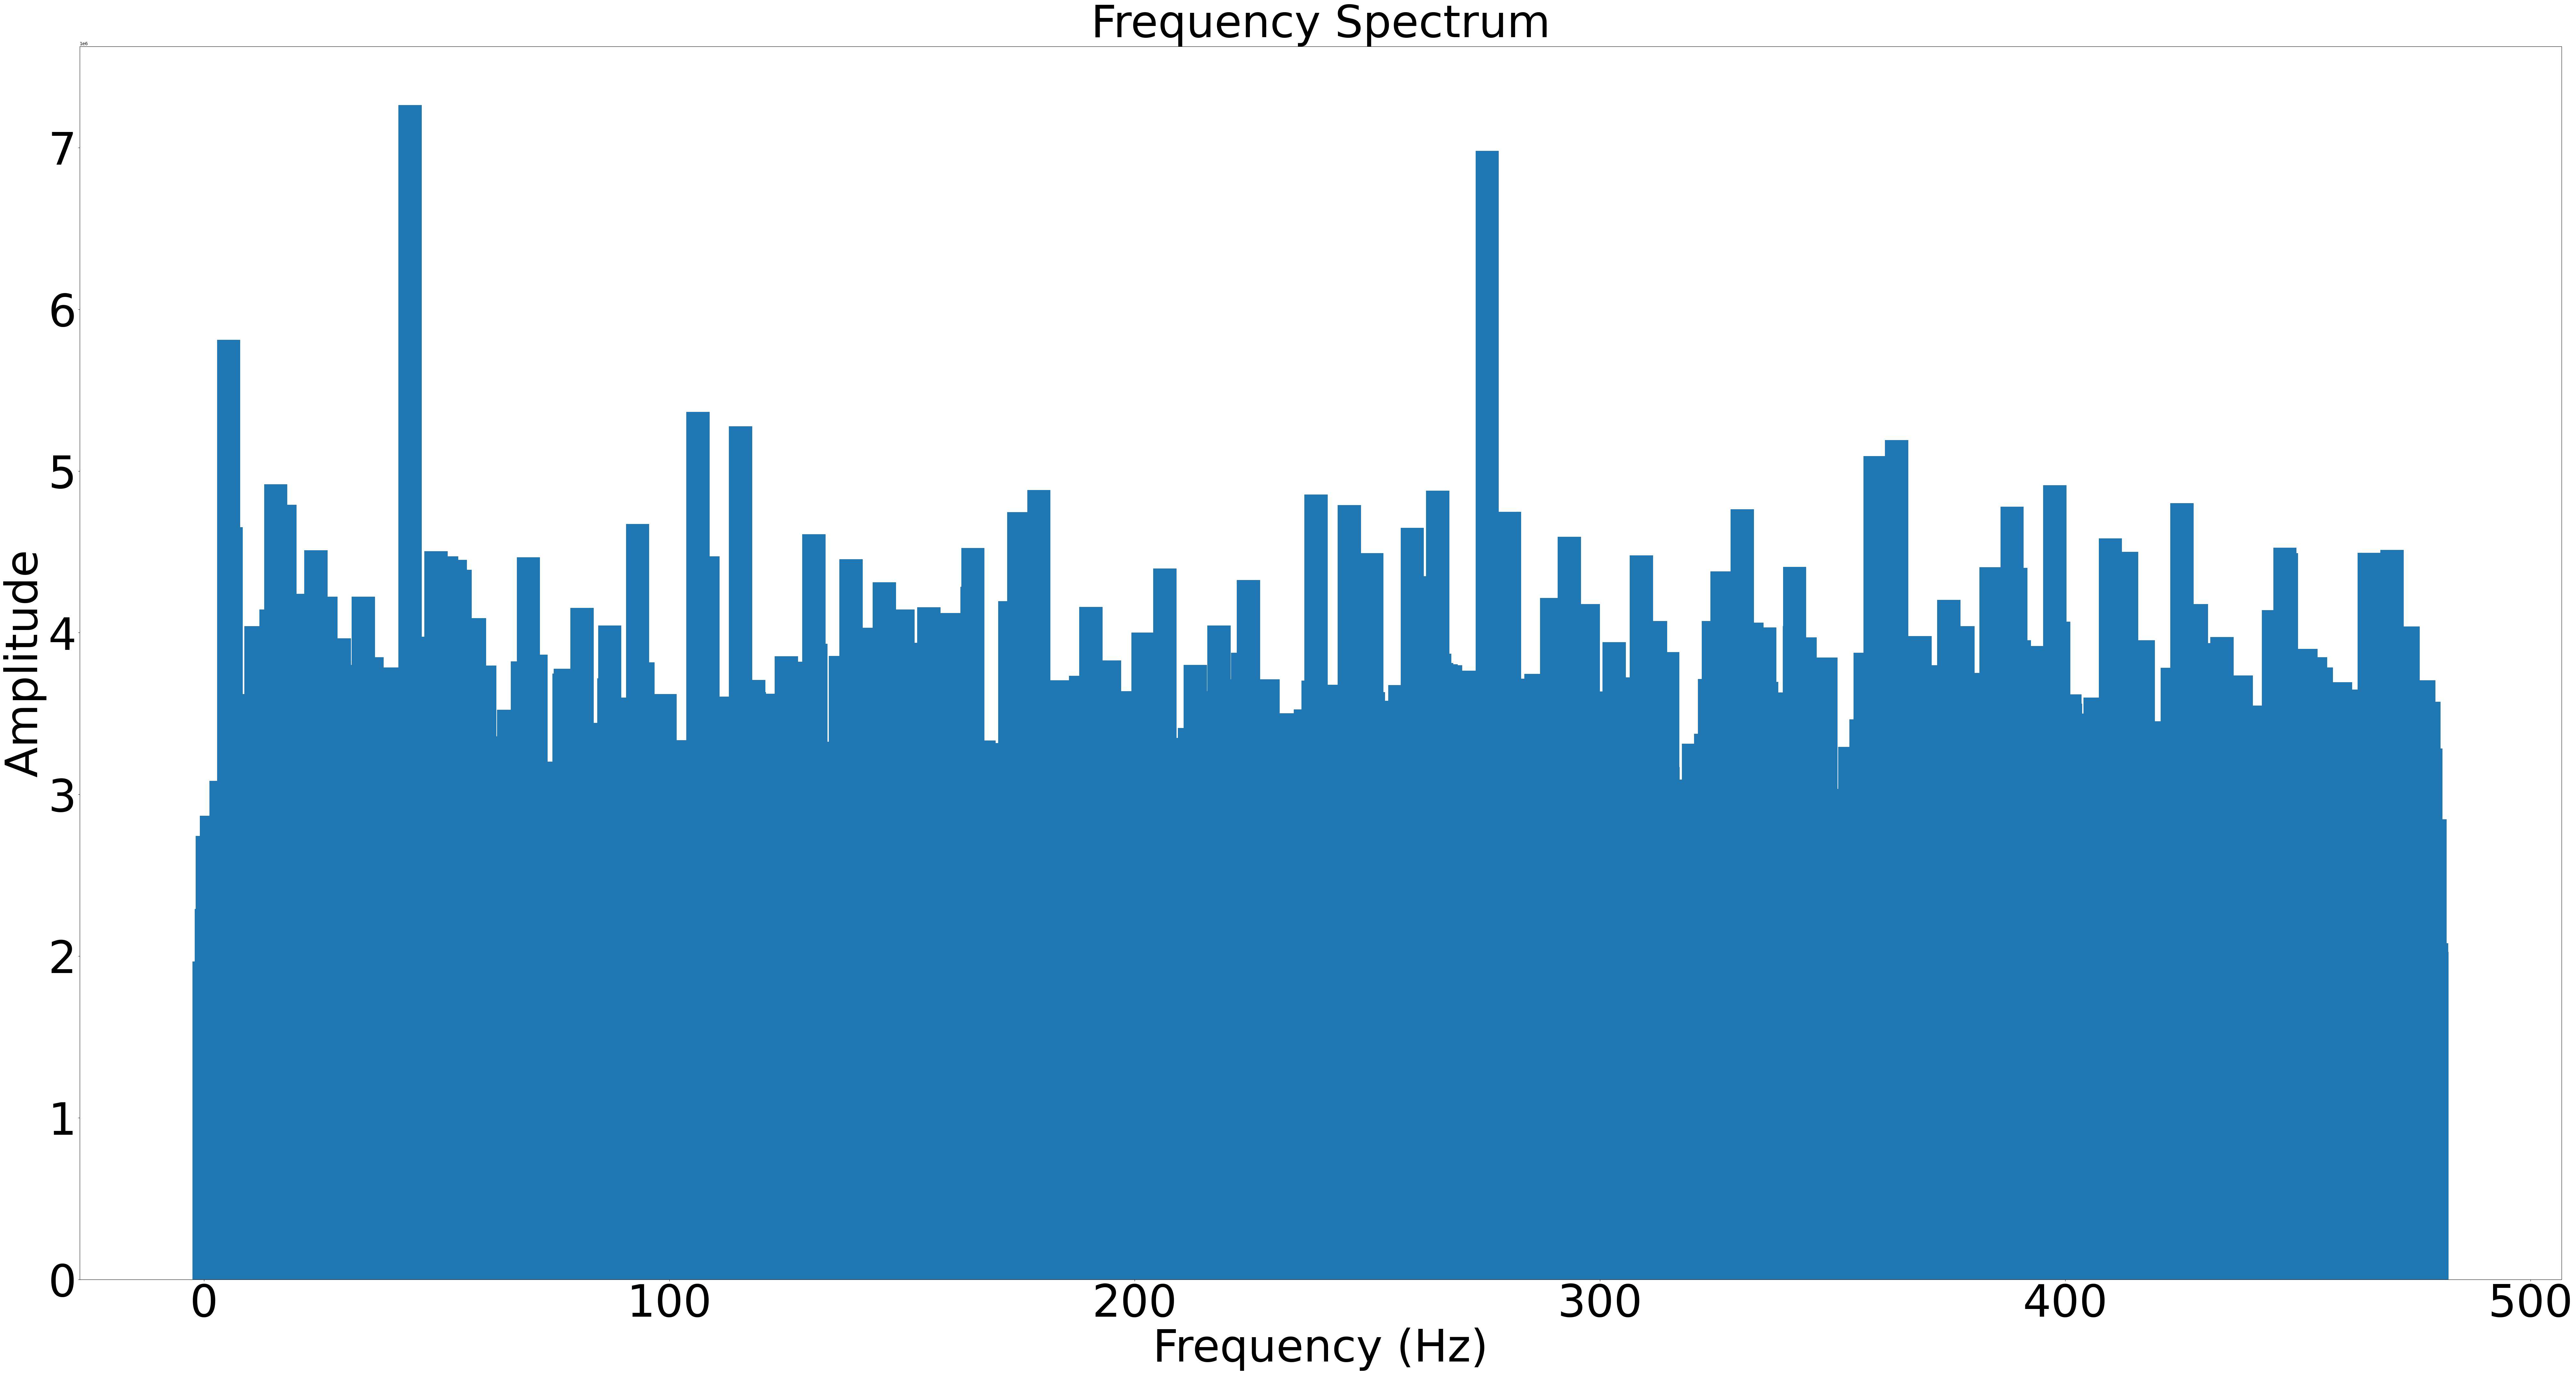

Maximum Frequency: 479.90460417356735 Hz
Amplitude at that Frequency: 2025223.0473922733
Minimum Frequency: 0.0 Hz
Amplitude at that Frequency: 1966084.999999999
Maximum Amplitude: 7263423.824654855
Frequency at Maximum Amplitude: 44.263663464723415 Hz


In [12]:
file_path = 'test.wav'
audio_array, sample_rate, num_channels = read_wav_file(file_path)

audio_array_sampled = audio_array[np.arange(0, len(audio_array),100)]
sample_rate_sampled = sample_rate / 100

print("sample rate = " + str(sample_rate))
print("length of audio array = " + str(len(audio_array_sampled)))
print("sample rate = " + str(sample_rate_sampled))

plot_frequency_spectrum(audio_array_sampled, sample_rate_sampled)

#print(plot_frequency_spectrum(audio_array_sampled, sample_rate_sampled))

In [13]:
# Bird Sound 
file_path = 'TIP1F_MixPre-1026.WAV'
audio_array, sample_rate, num_channels = read_wav_file(file_path)

audio_array_0 = audio_array[:64]
audio_array_1 = audio_array[64:128]
audio_array_2 = audio_array[128:192]
audio_array_3 = audio_array[192:256]

cutoff_frq = 1000
cutoff_mag = 200000

fft_arr, frq_arr = extract_fft_arrays(audio_array_1, sample_rate)

fft_arr = np.abs(fft_arr)
frq_arr = np.abs(frq_arr)
# print("fft_arr" + str(fft_arr))
# print("frq_arr" + str(frq_arr))

print(classifier(fft_arr, frq_arr, cutoff_frq, cutoff_mag))

FileNotFoundError: [Errno 2] No such file or directory: 'TIP1F_MixPre-1026.WAV'

In [46]:
# Nature Pond sound with other birds chirping 
file_path = 'pond-nature.wav'
audio_array, sample_rate, num_channels = read_wav_file(file_path)
print(audio_array)

# audio_array_0 = audio_array[:64]
# audio_array_1 = audio_array[64:128]
# audio_array_2 = audio_array[128:192]
# audio_array_3 = audio_array[192:256]

cutoff_frq = 1000
cutoff_mag = 200000

fft_arr, frq_arr = extract_fft_arrays(audio_array_3, sample_rate)

print(classifier(fft_arr, frq_arr, cutoff_frq, cutoff_mag))

[0 0 0 ... 0 0 0]
max_amplitude = 258638.2093452924
True


In [47]:
# Wind and Thunder
file_path = 'wind-thunder.wav'
audio_array, sample_rate, num_channels = read_wav_file(file_path)

# audio_array_0 = audio_array[:64]
# audio_array_1 = audio_array[64:128]
# audio_array_2 = audio_array[128:192]
audio_array_3 = audio_array[192:256]
# plot_frequency_spectrum(audio_array, sample_rate)

cutoff_frq = 1000
cutoff_mag = 200000

audio_array_sampled = audio_array[np.arange(0, len(audio_array),100)]
sample_rate_sampled = sample_rate / 100

# plot_frequency_spectrum(audio_array_sampled, sample_rate_sampled)
fft_arr, frq_arr = extract_fft_arrays(audio_array_2, sample_rate)

print(classifier(fft_arr, frq_arr, cutoff_frq, cutoff_mag))

max_amplitude = 234412.7655769164
True


In [48]:
# Classifier results on bird files

print(cutoff_frq, cutoff_mag)

# classifier definition print True False version
def classifier(fft_arr, frq_arr, cutoff_frq, cutoff_mag):
    fft_mags = np.abs(fft_arr)
    
    # high pass the frequency and fft arrays based on the cutoff frequency
    frq_hi_pass = frq_arr[frq_arr>cutoff_frq]
    
    fft_hi_pass = fft_mags[np.nonzero(frq_arr>cutoff_frq)]
    
    max_amplitude = np.max(fft_hi_pass)
    
    # if we have an amplitude that is greater than our cutoff, turn on the processor
    if max_amplitude > cutoff_mag:
        print("True, " + "max_amplitude = " + str(max_amplitude))
    else: 
        print("False")

files = ["SSF7F_MixPre-2286.WAV", "DR7F_MixPre-1461.WAV", "SSF3F_MixPre-2260_01.WAV", "SSF7F_MixPre-2287.WAV", "HC2F_MixPre-997.WAV", "DR2F_MixPre-1404.WAV", "JS3F_MixPre-1926_01.WAV", "SP1F_MixPre-1109.WAV", "SPSP2F_MixPre-1556_01.WAV", "SSR2F_MixPre-1367_01.WAV", "OS1F_MixPre-1472_01.WAV", "ONF11F_MixPre-2202_01.WAV", "SSF1F_MixPre-2237_01.WAV", "LHR3F_MixPre-1346_01.WAV", "SSR1F_MixPre-1363.WAV", "SSR2F_MixPre-1369.WAV", "CRU4F_MixPre-1745_01.WAV", "CH1F_MixPre-1060.WAV", "DR5F_MixPre-1430.WAV", "JS2F_MixPre-1920_01.WAV", "DR6F_MWW_MixPre-1448.WAV", "CRU7F_MixPre-1777_01.WAV", "SSR4F_MixPre-1389.WAV", "PSC3F_MixPre-1099.WAV", "DR3F_MixPre-1410.WAV", "NPN2F_MixPre-1285.WAV", "SSF2F_MixPre-2252_01.WAV", "SSR4F_MixPre-1390_01.WAV", "SSF6F_MixPre-2281.WAV", "LHR1F_MixPre-1315_01.WAV", "BSSP2F_MixPre-2318.WAV", "SSF5F_MixPre-2275.WAV", "SSF5F_MixPre-2274_01.WAV", "NPN2F_MixPre-1282.WAV", "JS1F_MixPre-1896_01.WAV", "BSSP1F_MixPre-2309.WAV", "wind-thunder.wav", "BSSP2F_MixPre-2317.WAV", "pond-nature.wav", "LA1F_MixPre-1022.WAV", "pure-sine.wav", "DR4F_DP10E_MixPre-1414.WAV", "GT2F_MixPre-2039_01.WAV", "SSR4F_MixPre-1389_01.WAV", "LHR1F_MixPre-1312_01.WAV", "LHR2F_MixPre-1341.WAV", "SSF5F_MixPre-2273_01.WAV", "HC1F_MixPre-994.WAV", "OS2F_MixPre-1480_01.WAV", "NPN1F_MixPre-1281.WAV", "TIP1F_MixPre-1026.WAV", "SSR3F_MixPre-1376.WAV", "ABS_MCBY_-YWX_MixPre-672.WAV", "LP1F_MixPre-1871_01.WAV", "SSF5F_MixPre-2269_01.WAV", "SLC1F_MixPre-1815_01.WAV", "LMC1F_MixPre-1946_01.WAV", "LHR3F_MixPre-1346.WAV", "HC2F_MixPre-2007_01.WAV", "OS1F_MixPre-1472.WAV", "CRU6F_MixPre-1768_01.WAV", "SHI1F_MixPre-1620_01.WAV", "DPC1F_MixPre-1301.WAV", "LHR1F_MixPre-1315.WAV", "SSF7F_MixPre-2288.WAV", "LHR2F_MixPre-1341_01.WAV", "LMC1F_MixPre-1944_01.WAV", "ONF13F_MixPre-2209_01.WAV", "SHI3F_MixPre-1643_01.WAV", "IMS1F_MixPre-1796_01.WAV", "SLC1F_MixPre-1809_01.WAV", "ONF3F_MixPre-2122_01.WAV"]

# loop through all given audio files and check classifier
for i in range(len(files)): 
    file_path = files[i]

    audio_array, sample_rate, num_channels = read_wav_file(file_path)

    cutoff_frq = 1000
    cutoff_mag = 300000
    
    audio_array_1 = audio_array[128:192]
    fft_arr, frq_arr = extract_fft_arrays(audio_array_2, sample_rate)
    
    sample_rate_sampled = sample_rate / 100


    print(files[i])
    classifier(fft_arr, frq_arr, cutoff_frq, cutoff_mag)
    print("")
    

SSF7F_MixPre-2286.WAV
True, max_amplitude = 333995.2261301747

DR7F_MixPre-1461.WAV
True, max_amplitude = 333995.2261301747

SSF3F_MixPre-2260_01.WAV
True, max_amplitude = 333995.2261301747

SSF7F_MixPre-2287.WAV
True, max_amplitude = 333995.2261301747

HC2F_MixPre-997.WAV
True, max_amplitude = 333995.2261301747

DR2F_MixPre-1404.WAV
True, max_amplitude = 333995.2261301747

JS3F_MixPre-1926_01.WAV
True, max_amplitude = 333995.2261301747

SP1F_MixPre-1109.WAV
True, max_amplitude = 333995.2261301747

SPSP2F_MixPre-1556_01.WAV
True, max_amplitude = 333995.2261301747

SSR2F_MixPre-1367_01.WAV
True, max_amplitude = 333995.2261301747

OS1F_MixPre-1472_01.WAV
True, max_amplitude = 333995.2261301747

ONF11F_MixPre-2202_01.WAV
True, max_amplitude = 333995.2261301747

SSF1F_MixPre-2237_01.WAV
True, max_amplitude = 333995.2261301747

LHR3F_MixPre-1346_01.WAV
True, max_amplitude = 333995.2261301747

SSR1F_MixPre-1363.WAV
True, max_amplitude = 333995.2261301747

SSR2F_MixPre-1369.WAV
True, max_ampl